In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro, ttest_ind

In [3]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Datasets/MLSH-dataset-L1.csv')
dataset.head()

,Participant,Category,NN_RR,AVNN,IHR,SDNN,SDANN,SDNNIDX,rMSSD,pNN10,pNN20,pNN30,pNN40,pNN50,tot_pwr,ULF,VLF,LF,HF,LF_HF,LF_n,HF_n
0,0,A,0.999970,836.336,71.741501,74.9342,45.5641,55.4628,25.1387,61.3931,29.6775,16.4170,6.17343,3.44122,5852.65,2675.950,2082.66,847.965,246.077,3.44593,0.775075,0.224925
1,1,A,0.999680,980.794,61.174926,86.4631,57.3369,55.6853,26.9386,60.9649,26.4666,14.1151,6.12600,3.87186,8793.63,4467.600,3145.01,985.214,195.798,5.03179,0.834212,0.165788
2,2,A,0.993108,1000.260,59.984404,59.7562,32.5391,47.8997,31.0587,59.4547,29.5596,19.1820,10.53270,7.39094,3723.20,1336.050,1322.78,802.306,262.058,3.06156,0.753789,0.246211
3,3,A,0.959997,787.438,76.196475,59.2220,27.0160,39.2539,43.5362,29.7286,13.7209,12.5419,11.46800,10.68200,2813.47,761.872,1339.35,361.275,350.971,1.02936,0.507233,0.492767
4,4,B,0.999689,973.366,61.641767,117.9690,67.9543,89.0453,73.9128,86.7052,72.8064,63.7922,51.80280,44.24510,14734.80,6590.450,4729.39,2354.480,1060.520,2.22012,0.689452,0.310548


In [4]:
dataA= dataset.IHR[dataset['Category']== 'A']
dataB= dataset.IHR[dataset['Category']== 'B']

In [5]:
def check_norm(a):
  stat, p = shapiro(a)
  if p>0.05:
    print(p, 'Fail to reject H0, It looks like Normal distribution')
  else:
    print(p, 'Reject H0, It is not like Normal distribution')

In [6]:
# Is Categorical A is normal distribution with IHR
check_norm(dataA)

7.588713742734399e-06 Reject H0, It is not like Normal distribution


In [7]:
# Is Categorical A is normal distribution with IHR
check_norm(dataB)

0.030753672122955322 Reject H0, It is not like Normal distribution


In [8]:
print(np.mean(dataA),np.median(dataA))
print(np.mean(dataB),np.median(dataB))

63.02048112202832 62.646861845
64.01073590869565 62.29636874


In [9]:
if np.mean(dataA) < np.median(dataA):
  print('Categorical A has the distribution that Skewed to the left')
else:
  print('Categorical A has the distribution that Skewed to the right')

if np.mean(dataB) < np.median(dataB):
  print('Categorical B has the distribution that Skewed to the left')
else:
  print('Categorical B has the distribution that Skewed to the right')

Categorical A has the distribution that Skewed to the right
Categorical B has the distribution that Skewed to the right


(array([ 4.,  3., 13., 17., 11.,  9.,  4.,  2.,  4.,  2.]),
 array([44.57685421, 49.24467183, 53.91248945, 58.58030708, 63.2481247 ,
        67.91594232, 72.58375994, 77.25157756, 81.91939519, 86.58721281,
        91.25503043]),
 <a list of 10 Patch objects>)

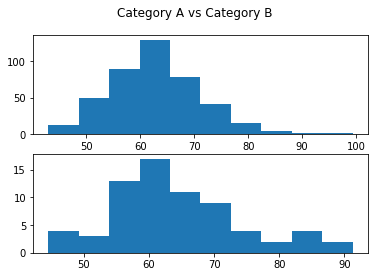

In [10]:
fig, axs = plt.subplots(2,1)
fig.suptitle('Category A vs Category B')
axs[0].hist(dataA)
axs[1].hist(dataB)


In [11]:
## Check 2 dataset to find if there is any significant difference between the groups
stat, p = ttest_ind(dataA,dataB)
if p>0.05:
  print('There is not enough evidence to reject H0, there is no difference between the groups')
else:
  print('There is significant evidence to reject H0, there is difference between the groups')

There is not enough evidence to reject H0, there is no difference between the groups
